# MODELO LOGISTICO

En este Notebook implementares el Modelo logistico de crecimiento tumoral. Este Notebook se centra en la programación las explicaciones de las logicas de los parametros, conclusiones y explicaciones teoricas de los metodos se encontraran en el pdf del TFM.

Los datos reales que se van a utilizar son un invento simple, si se quisiera hacer con datos reales se tendria que traer los datos del momento en el que se ha medido el tumor y su tamaño.

Esto es un simple ejemplo, despues en un estudio con datos reales deberiamos amplificar estos con los datos que se tiene.

Para ello haremos tres partes distinta.

La primera sera encontrar la solución del modelo logistico y visualizar una solución concreta.

La segunda sera ver como encontrar los mejores parametros.

La tercera sera como poder comprobar que el modelo es adecuado comparandolo con nuestros datos reales.

## SOLUCIÓN Y GRAFICA

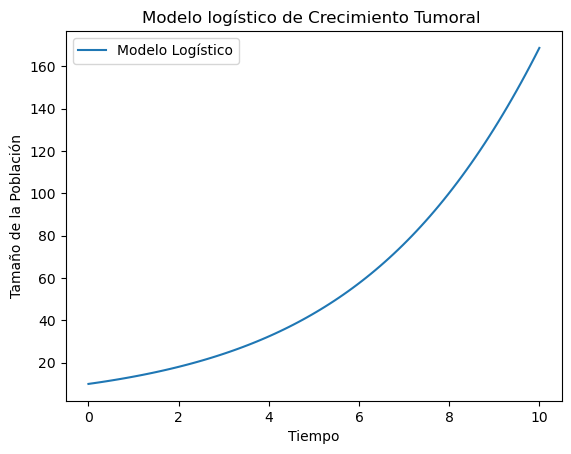

In [55]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo log
def log_model(t, N, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

# Parámetros del modelo log
r = 0.3  # Tasa de crecimiento máxima
K = 1000  # Capacidad de carga

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población
initial_conditions = [N0]

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp
solution = solve_ivp(log_model, t_span, initial_conditions, args=(r, K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
population_at_time_t_eval = solution.sol(t_eval)

# Visualizar los resultados
plt.plot(t_eval, population_at_time_t_eval[0], label='Modelo Logístico')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Modelo logístico de Crecimiento Tumoral ')
plt.legend()

# Guardar la gráfica como una imagen (por ejemplo, PNG)
plt.savefig('modelo_logístico.png')

# Mostrar la gráfica
plt.show()


Se puede comparar a simple vista con el modelo de gompertz.

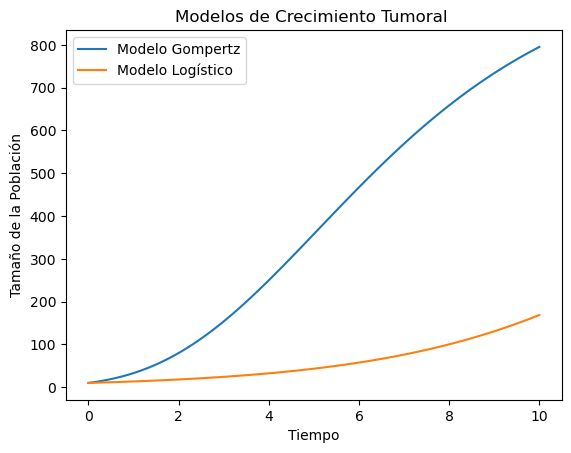

In [56]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(t, N, r, K):
    dNdt = -r * N * np.log(N / K)
    return dNdt

def log_model(t, N, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

# Parámetros del modelo Gompertz
r = 0.3  # Tasa de crecimiento máxima
K = 1000  # Capacidad de carga

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población
initial_conditions = [N0]

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp
solution = solve_ivp(gompertz_model, t_span, initial_conditions, args=(r, K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
population_at_time_t_eval = solution.sol(t_eval)

solutionlog= solve_ivp(log_model, t_span, initial_conditions, args=(r, K), dense_output=True)
population_at_time_t_evallog = solutionlog.sol(t_eval)
# Visualizar los resultados
plt.plot(t_eval, population_at_time_t_eval[0], label='Modelo Gompertz')
plt.plot(t_eval, population_at_time_t_evallog[0], label='Modelo Logístico')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Modelos de Crecimiento Tumoral ')
plt.legend()

# Guardar la gráfica como una imagen (por ejemplo, PNG)
plt.savefig('modeloscomparación.png')

# Mostrar la gráfica
plt.show()


## AJUSTE DE PARAMETROS


### CURVE FIT

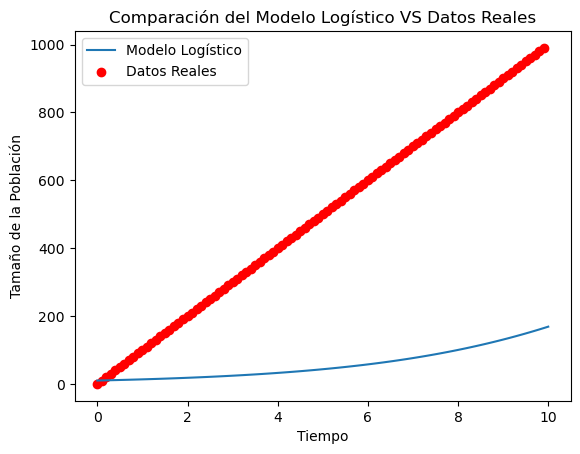

In [57]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo log

def log_model(t, N, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo log
true_r = 0.3
true_K = 1000


# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp para generar datos "reales"
solution = solve_ivp(log_model, t_span, [N0], args=(true_r, true_K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = solution.sol(t_eval)

# Visualizar los resultados
plt.plot(t_eval, true_population_at_time_t_eval[0], label='Modelo Logístico')

# Datos Reales (t, N)
datos_reales = np.array([(i / 10, i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)
plt.scatter(tiempos_reales, poblaciones_reales, color='red', label='Datos Reales')

plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Comparación del Modelo Logístico VS Datos Reales')
plt.legend()

# Mostrar la gráfica
plt.show()



RESPECTO A LOS DATOS REALES QUE TENEMOS CLARAMENTE SE AJUSTA PEOR QUE EL MODELO GOMPERTZ 

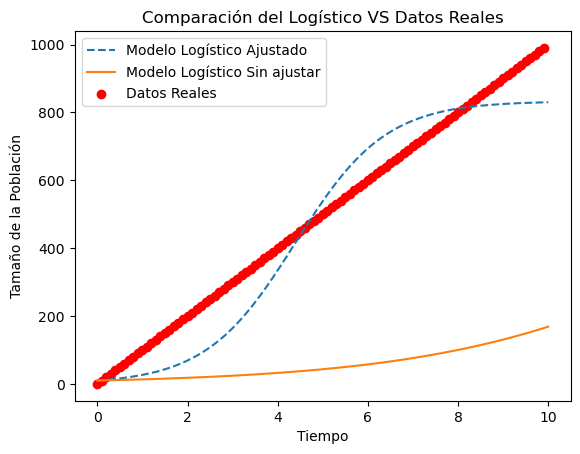

Parámetros ajustados (r, K): [  1.00266872 832.97819654]


In [58]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo log
def log_model(t, N, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo log sinajustar
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp para generar datos "reales"
solution = solve_ivp(log_model, t_span, [N0], args=(true_r, true_K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = solution.sol(t_eval)

# Datos Reales (t, N)
datos_reales = np.array([(i/10 , i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función a ajustar con curve_fit
def log_fit_function(t, r, K):
    N0 = 10  # Condiciones iniciales
    solution = solve_ivp(log_model, t_span, [N0], args=(r, K), dense_output=True)
    return solution.sol(t)[0]

# Ajustar el modelo log a los datos observados utilizando curve_fit
params, covariance = curve_fit(log_fit_function, tiempos_reales, poblaciones_reales)

# Generar la curva ajustada
fitted_curve =log_fit_function(t_eval, *params)

# Visualizar los resultados
plt.plot(t_eval, fitted_curve, label='Modelo Logístico Ajustado', linestyle='--')
plt.plot(t_eval, true_population_at_time_t_eval[0], label='Modelo Logístico Sin ajustar')

# Datos Reales (t, N)
plt.scatter(tiempos_reales, poblaciones_reales, color='red', label='Datos Reales')

plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Comparación del Logístico VS Datos Reales')
plt.legend()

# Mostrar la gráfica
plt.show()

# Imprimir los parámetros ajustados
if np.any(np.isnan(params)):
    print("Falló el ajuste de la curva. Verifica los datos de entrada y las condiciones iniciales.")
    print("Matriz de covarianza:", covariance)
else:
    print("Parámetros ajustados (r, K):", params)

Claramente Curve fit funciona porque se asemeja esa funcion de log con esos parametros a los datos reales.

### METODOS DE MINIMOS CUADRADOS

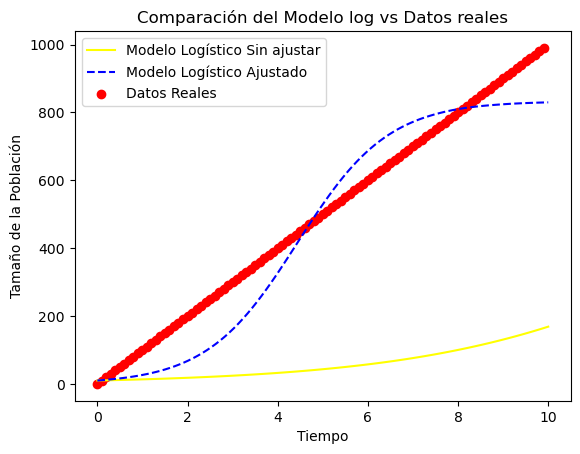

Parámetros ajustados (r, K): [  0.99265257 832.95827342]


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import solve_ivp

# Función que representa la ecuación diferencial del modelo log
def log_model(t, N, r, K):
    dNdt = r * N * (1 - N / K)
    return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Log sin ajustar
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial de forma numérica utilizando solve_ivp
def integrate_log(r, K, t_eval):
    sol = solve_ivp(log_model, t_span, [N0], args=(r, K), t_eval=t_eval)
    return sol.y.flatten()

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Datos Reales (t, N)
datos_reales = np.array([(i / 10, i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función objetivo para mínimos cuadrados
def objective_function(params, t, data, t_eval):
    r, K = params
    fitted_curve = integrate_log(r, K, t_eval)
    return fitted_curve - data

# Estimación inicial de los parámetros
initial_params = [0.1, 500]

# Minimizar la función objetivo utilizando least_squares
result = least_squares(objective_function, initial_params, args=(tiempos_reales, poblaciones_reales, t_eval))

# Obtener los parámetros ajustados
params = result.x

# Generar la curva ajustada
fitted_curve = integrate_log(*params, t_eval)

# Visualizar los resultados
plt.plot(t_eval, true_population_at_time_t_eval[0], label='Modelo Logístico Sin ajustar',color='yellow')
plt.plot(t_eval, fitted_curve, label='Modelo Logístico Ajustado', linestyle='--',color='blue')
plt.scatter(tiempos_reales, poblaciones_reales, color='red', label='Datos Reales')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Comparación del Modelo log vs Datos reales')
plt.legend()

# Mostrar la gráfica
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados (r, K):", params)




Dan una r y K muy distinta. A continuación se vera que tecnica ajusta mejor los parametros del modelo.

Primero veremos en una grafica la diferencia de los modelos con los distintos parametros.

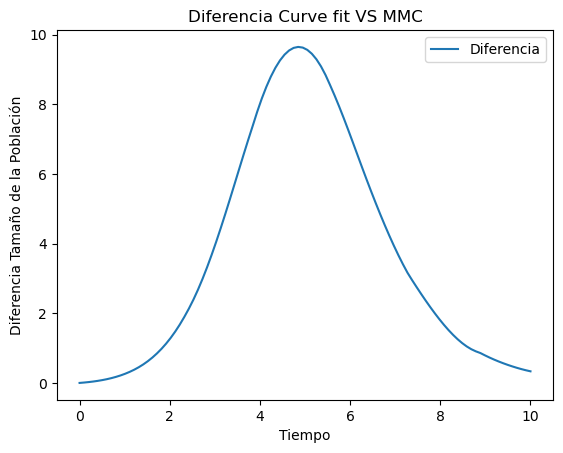

In [60]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo log
def log_model(t, N, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

# Parámetros del modelo log
r=1.00266872 
K=832.978196

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población
initial_conditions = [N0]

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp
solution = solve_ivp(log_model, t_span, initial_conditions, args=(r, K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)
population_at_time_t_eval = solution.sol(t_eval)
r2= 0.99265257
K2=832.95827342
# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos

solution2 = solve_ivp(log_model, t_span, initial_conditions, args=(r2, K2), dense_output=True)
population_at_time_t_eval2 = solution2.sol(t_eval)
# Visualizar los resultados
plt.plot(t_eval, abs(population_at_time_t_eval[0]-population_at_time_t_eval2[0]), label='Diferencia')
plt.xlabel('Tiempo')
plt.ylabel('Diferencia Tamaño de la Población')
plt.title('Diferencia Curve fit VS MMC')
plt.legend()

# Guardar la gráfica como una imagen (por ejemplo, PNG)
plt.savefig('modelo_logístico(CurveVSMmC.png')

# Mostrar la gráfica
plt.show()

DISTRIBUCIÓN NORMAL QUE CASUALIDAD!!

### METRICAS DE EVALUACION

#### Error Cuadrático Medio (MSE) y el Coeficiente de Determinación para Curve_fit

In [61]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo log
def log_model(t, N, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo log sinajustar


# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp para generar datos "reales"
solution = solve_ivp(log_model, t_span, [N0], args=(true_r, true_K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = solution.sol(t_eval)

# Datos Reales (t, N)
datos_reales = np.array([(i/10 , i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función a ajustar con curve_fit
def log_fit_function(t, r, K):
    N0 = 10  # Condiciones iniciales
    solution = solve_ivp(log_model, t_span, [N0], args=(r, K), dense_output=True)
    return solution.sol(t)[0]

# Ajustar el modelo log a los datos observados utilizando curve_fit
params, covariance = curve_fit(log_fit_function, tiempos_reales, poblaciones_reales)

# Generar la curva ajustada
fitted_curve =log_fit_function(t_eval, *params)

# Visualizar los resultados

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(poblaciones_reales, fitted_curve)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(poblaciones_reales, fitted_curve)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 7743.0481402642645
Coeficiente de Determinación (R^2): 0.9070741297298018


#### Metodo de Residuos para Curve_fit

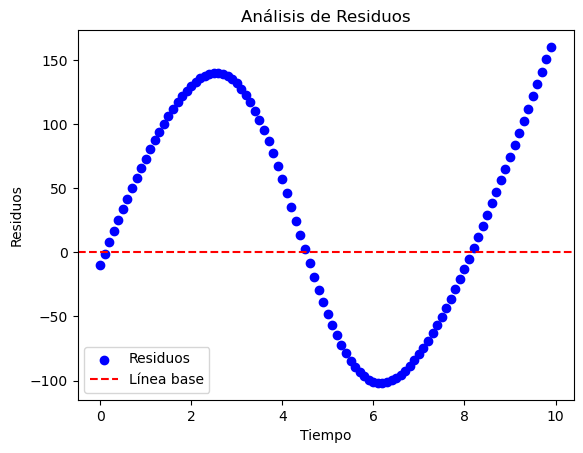

In [62]:
residuos = poblaciones_reales - fitted_curve

# Visualizar los residuos
plt.scatter(tiempos_reales, residuos, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea base')

plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.legend()
plt.show()

#### Error Cuadrático Medio (MSE) y el Coeficiente de Determinación para Metodos de Minimos Cuadrados

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import solve_ivp

# Función que representa la ecuación diferencial del modelo log
def log_model(t, N, r, K):
    dNdt = r * N * (1 - N / K)
    return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Log sin ajustar
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial de forma numérica utilizando solve_ivp
def integrate_log(r, K, t_eval):
    sol = solve_ivp(log_model, t_span, [N0], args=(r, K), t_eval=t_eval)
    return sol.y.flatten()

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Datos Reales (t, N)
datos_reales = np.array([(i / 10, i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función objetivo para mínimos cuadrados
def objective_function(params, t, data, t_eval):
    r, K = params
    fitted_curve = integrate_log(r, K, t_eval)
    return fitted_curve - data

# Estimación inicial de los parámetros
initial_params = [0.1, 500]

# Minimizar la función objetivo utilizando least_squares
result = least_squares(objective_function, initial_params, args=(tiempos_reales, poblaciones_reales, t_eval))

# Obtener los parámetros ajustados
params = result.x

# Generar la curva ajustada
fitted_curve = integrate_log(*params, t_eval)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(poblaciones_reales, fitted_curve)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(poblaciones_reales, fitted_curve)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 7725.087310840215
Coeficiente de Determinación (R^2): 0.9072896812380412


Parece mejor metodo el MMC

#### Metodo de Residuos para MMC

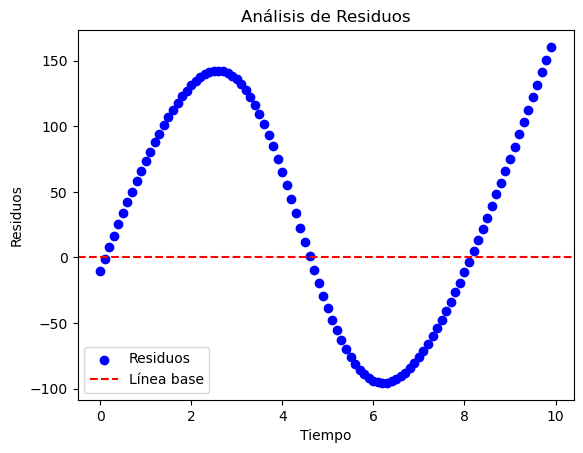

In [64]:
residuos = poblaciones_reales - fitted_curve

# Visualizar los residuos
plt.scatter(tiempos_reales, residuos, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea base')

plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.legend()
plt.show()

Ahora graficar los dos residuos juntos. Los de los dos metodos.

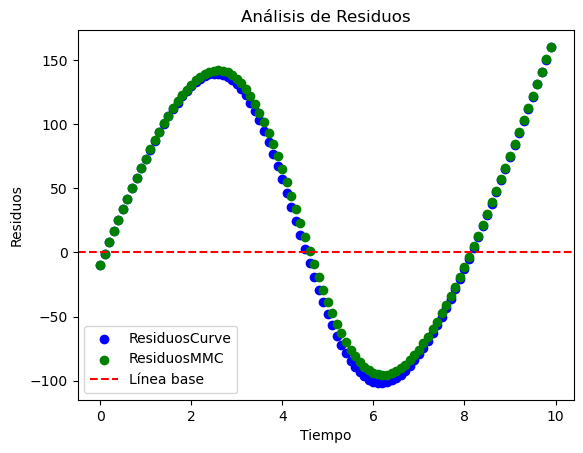

In [65]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo log
def log_model(t, N, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

# Parámetros del modelo log
r=1.00266872 
K=832.978196

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población
initial_conditions = [N0]

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp
solution = solve_ivp(log_model, t_span, initial_conditions, args=(r, K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)
population_at_time_t_eval = solution.sol(t_eval)
r2= 0.99265257
K2=832.95827342
# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos

solution2 = solve_ivp(log_model, t_span, initial_conditions, args=(r2, K2), dense_output=True)
population_at_time_t_eval2 = solution2.sol(t_eval)

residuos1 = poblaciones_reales - population_at_time_t_eval[0]
residuos2= poblaciones_reales - population_at_time_t_eval2[0]

# Visualizar los residuos
plt.scatter(tiempos_reales, residuos1, color='blue', label='ResiduosCurve')
plt.scatter(tiempos_reales, residuos2, color='green', label='ResiduosMMC')
plt.axhline(y=0, color='red', linestyle='--', label='Línea base')

plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.legend()
plt.show()



#### Metodo Validación Cruzada para Curve_fit

MSE en conjunto de prueba: 7230.03960932044
Coeficiente de Determinación (R^2) en conjunto de prueba: 0.9097767566067206


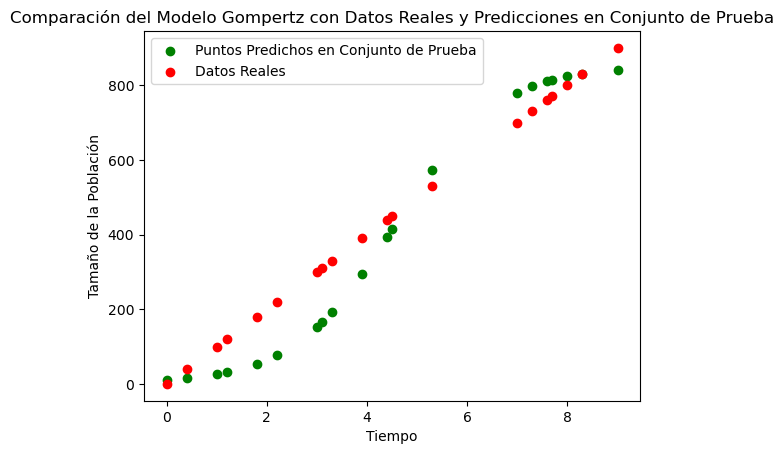

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo log
def log_model(t, N, r, K):
    dNdt = r * N * (1 - N / K)
    return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población



# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp para generar datos "reales"
solution = solve_ivp(gompertz_model, t_span, [N0], args=(true_r, true_K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = solution.sol(t_eval)

# Datos Reales (t, N)
datos_reales = np.array([(i/10 , i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)



# Definir la función a ajustar con curve_fit
def log_fit_function(t, r, K):
    N0 = 10  # Condiciones iniciales
    solution = solve_ivp(log_model, t_span, [N0], args=(r, K), dense_output=True)
    return solution.sol(t)[0]

# Ajustar el modelo log a los datos observados utilizando curve_fit
params, covariance = curve_fit(log_fit_function, tiempos_reales, poblaciones_reales)
# Generar la curva ajustada
fitted_curve = log_fit_function(t_eval, *params)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tiempos_reales, poblaciones_reales, test_size=0.2, random_state=42)

# Ajustar el modelo en el conjunto de entrenamiento
params_cross_val, _ = curve_fit(log_fit_function, X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred_test = log_fit_function(X_test, *params_cross_val)

# Calcular métricas en el conjunto de prueba
mse_cross_val = mean_squared_error(y_test, y_pred_test)
r2_cross_val = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("MSE en conjunto de prueba:", mse_cross_val)
print("Coeficiente de Determinación (R^2) en conjunto de prueba:", r2_cross_val)
plt.scatter(X_test, y_pred_test, color='green', label='Puntos Predichos en Conjunto de Prueba')
plt.scatter(X_test, y_test, color='red', label='Datos Reales')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Comparación del Modelo Gompertz con Datos Reales y Predicciones en Conjunto de Prueba')
plt.legend()
plt.show()

#### Metodo Validación Cruzada para el metodo de minimos cuadrados

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Función que representa la ecuación diferencial del modelo log
def log_model(t, N, r, K):
    dNdt = r * N * (1 - N / K)
    return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Log sin ajustar
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial de forma numérica utilizando solve_ivp
def integrate_log(r, K, t_eval):
    sol = solve_ivp(log_model, t_span, [N0], args=(r, K), t_eval=t_eval)
    return sol.y.flatten()

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Datos Reales (t, N)
datos_reales = np.array([(i / 10, i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función objetivo para mínimos cuadrados
def objective_function(params, t, data, t_eval):
    r, K = params
    fitted_curve = integrate_log(r, K, t_eval)
    return fitted_curve - data

# Estimación inicial de los parámetros
initial_params = [0.1, 500]


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tiempos_reales, poblaciones_reales, test_size=0.1, random_state=42)
X_train=np.sort(X_train)
X_test=np.sort(X_test)
# Minimizar la función objetivo utilizando least_squares en el conjunto de entrenamiento
result = least_squares(objective_function, initial_params, args=(X_train, y_train, X_train))

# Obtener los parámetros ajustados
params = result.x
print("Parámetros ajustados (r, K):", params)

# Generar la curva ajustada en el conjunto de prueba
fitted_curve = integrate_log(*params, X_test)

# Calcular métricas en el conjunto de prueba (por ejemplo, MSE y R^2)
mse = mean_squared_error(y_test, fitted_curve)
r2 = r2_score(y_test, fitted_curve)

# Imprimir métricas
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Parámetros ajustados (r, K): [ 21.3391132  502.64728862]
Error Cuadrático Medio (MSE): 131405.6984444196
Coeficiente de Determinación (R^2): -0.8321022035081649
